### 1. Neurons and Artificial Neural Networks
An artificial neural network (ANN) is a computational model inspired by the way biological neurons process information. In ANNs, the building block is a **neuron** (also called a **node** or **perceptron**), which receives inputs, applies weights, biases, and an activation function, and produces an output.

#### Mathematical Representation of a Neuron
A neuron computes a weighted sum of its inputs, applies an activation function, and outputs the result:

\[
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
\]

- \( x_i \): Input features
- \( w_i \): Weight corresponding to each input
- \( b \): Bias term
- \( f \): Activation function

The neuron adjusts the weights and bias through learning, using methods like **backpropagation**.

### 2. Activation Functions
Activation functions introduce non-linearity to the model, allowing the network to learn complex patterns. Here are the commonly used activation functions:

#### a) Sigmoid Function
The **sigmoid** activation function maps any input to a value between 0 and 1:

\[
\sigma(x) = \frac{1}{1 + e^{-x}}
\]

- **Usage**: Often used in binary classification tasks.
- **Properties**: Smooth curve, but suffers from vanishing gradients for large positive/negative values.

#### Python Code for Sigmoid Activation
```python
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
```

#### b) Tanh Function
The **tanh** function scales inputs to a range between -1 and 1:

\[
\text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
\]

- **Usage**: Suitable for hidden layers.
- **Properties**: Centered around zero, but can still suffer from vanishing gradients for large values.

#### Python Code for Tanh Activation
```python
def tanh(x):
    return np.tanh(x)
```

#### c) ReLU (Rectified Linear Unit)
The **ReLU** function is defined as:

\[
\text{ReLU}(x) = \max(0, x)
\]

- **Usage**: Common in hidden layers for deep networks.
- **Properties**: Efficient and reduces vanishing gradients but can lead to “dead neurons” (where neurons stop updating).

#### Python Code for ReLU Activation
```python
def relu(x):
    return np.maximum(0, x)
```

### 3. Feedforward Neural Networks
In a **feedforward neural network**, data flows from input to output without any cycles. The network consists of multiple layers:

1. **Input Layer**: Receives initial data.
2. **Hidden Layers**: Layers between input and output, where neurons process data.
3. **Output Layer**: Produces the final result.

#### Forward Pass Calculation
For each layer \( L \):
1. Compute \( z^{(L)} = W^{(L)} \cdot a^{(L-1)} + b^{(L)} \)
2. Apply the activation function to get \( a^{(L)} = f(z^{(L)}) \)

---

### 4. Backpropagation
**Backpropagation** is an algorithm used to update the weights of the network, aiming to minimize the error.

#### Steps of Backpropagation
1. **Calculate the Loss**: Compute the error at the output layer using a loss function (e.g., mean squared error for regression or cross-entropy for classification).
2. **Compute Gradients**:
   - For each layer, compute the gradient of the loss with respect to weights and biases.
3. **Update Weights**:
   - Adjust weights in the opposite direction of the gradient (gradient descent).

#### Backpropagation Mathematical Derivation
For a single neuron, the loss with respect to a weight \( w_i \) is:

\[
\frac{\partial \text{Loss}}{\partial w_i} = \frac{\partial \text{Loss}}{\partial y} \cdot \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial w_i}
\]

where:
- \( y = f(z) \) and \( z = \sum w_i x_i + b \).

#### Python Code Example for Backpropagation (Simple Neural Network)
This is a simplified example for two layers.

```python
import numpy as np

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Simple neural network with 2 layers
class NeuralNetwork:
    def __init__(self):
        # Initialize weights and biases
        self.weights = np.random.rand(2, 1)
        self.bias = np.random.rand(1)

    def forward(self, X):
        # Forward pass
        self.input = X
        self.z = np.dot(self.input, self.weights) + self.bias
        self.output = sigmoid(self.z)
        return self.output

    def backward(self, X, y, output):
        # Backward pass
        d_loss_output = 2 * (output - y)
        d_output_z = sigmoid_derivative(output)
        d_z_weights = X

        # Chain rule for gradient
        d_loss_weights = d_z_weights.T.dot(d_loss_output * d_output_z)
        d_loss_bias = np.sum(d_loss_output * d_output_z)

        # Update weights and bias
        self.weights -= 0.1 * d_loss_weights
        self.bias -= 0.1 * d_loss_bias

# Example usage
nn = NeuralNetwork()
X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([[0], [1], [0]])

# Training loop
for _ in range(1000):
    output = nn.forward(X)
    nn.backward(X, y, output)

print("Predicted output after training:")
print(nn.forward(X))
```

---

### 5. Vanishing and Exploding Gradients
When training deep networks, gradients can become very small (vanishing) or very large (exploding), leading to training issues.

#### Techniques to Address Gradient Problems
1. **ReLU Activation**: Reduces vanishing gradients, as gradients do not diminish for positive inputs.
2. **Batch Normalization**: Normalizes each layer’s input, helping control gradient size.
3. **Weight Initialization**: Techniques like **Xavier** or **He initialization** adjust weights based on layer size to stabilize gradients.

#### Example of Batch Normalization in Code
```python
import torch
import torch.nn as nn

# Define a model with batch normalization
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(128, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.bn1(torch.relu(self.fc1(x)))
        x = self.bn2(torch.relu(self.fc2(x)))
        return self.fc3(x)
```

### Summary
- **Neurons** process data through weights, biases, and activations.
- **Activation Functions** introduce non-linearity.
- **Feedforward Networks** allow data flow from input to output layers.
- **Backpropagation** updates weights by minimizing loss.
- **Gradient Issues** are addressed using ReLU, batch normalization, and weight initialization.

This guide provides a foundational understanding of ANNs, key math concepts, and sample code to implement simple neural networks.

**Coding a basic neuron**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputs = [2,4,7]
weights = [0.3, 0.5, -0.2]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias  
print(output)

3.2


In [3]:
inputs = [1, 2,3,4]
weights = [2,3,4,5]
bias = 5
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias  
print(output)

45


In [4]:
inputs = weights = list(range(1,11))
print(inputs)
print(weights)
bias = 10
output = 0

for i in range(len(inputs)):
    output += inputs[i]*weights[i]
    
output += bias
print(output)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
395


In [5]:
output = np.dot(inputs, weights) +  bias
print(output)

395


**ReLU Activation**

In [6]:
# y = max(0, x)
Y = max(0, output)
print(Y)

395


In [7]:
inputs = [-1, -2, -3, -4]
weights = [0.2, 0.3, 0.4, 0.5]
bias = -10

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias  
print(output)

Y = max(0, output)

print(Y)

-14.0
0


**Coding the whole Neural network**

In [8]:
inputs = np.random.randint(0, 10, 3)
weights = np.random.random(3)
bias = 10

print(inputs)
print(weights)

output = np.dot(inputs, weights) + bias
print(output)

[9 0 2]
[0.97129945 0.99035082 0.4356208 ]
19.612936685319724


**A layer is nothing but a collection of a neurons**

In [9]:
inputs = [1, 2, 3]
weights = [[0.1, 0.2, 0.3], [0.1, 0.4, 0.7], [0.4, 0.6, 0.8], [0.5, 0.7, 0.9]]

output1 = inputs[0]*weights[0][0] + inputs[1]*weights[0][1] + inputs[2]*weights[0][2]
output2 = inputs[0]*weights[1][0] + inputs[1]*weights[1][1] + inputs[2]*weights[1][2]
output3 = inputs[0]*weights[2][0] + inputs[1]*weights[2][1] + inputs[2]*weights[2][2]
output4 = inputs[0]*weights[3][0] + inputs[1]*weights[3][1] + inputs[2]*weights[3][2]

print(output1, output2, output3, output4)


#weights = np.array([[0.1, 0.2, 0.3], [0.1, 0.4, 0.7], [0.4, 0.6, 0.8], [0.5, 0.7, 0.9]])
#print(weights.shape)

1.4 2.9999999999999996 4.0 4.6


In [10]:
inputs = np.random.randint(0, 10, 3)
weights = np.random.random((4, 3)) #4 neurons , 3 weights for each neuron
biases = np.random.randint(0, 5, 4)

output = np.dot(inputs, weights.T) + biases #columns of first = row of the second matrix
print(output)

[6.64231729 6.25960317 6.97438531 2.80126686]


In [11]:
inputs = np.random.randint(0, 10, 3)
weights1 = np.random.random((4, 3)) #4 neurons , 3 weights for each neuron
biases1 = np.random.randint(0, 5, 4)  #for layer 1

output1 = np.dot(inputs, weights1.T) + biases1 #columns of first = row of the second matrix
print(output1)

weights2 = np.random.random((3, 4))
biases2 = np.random.randint(0,5,3)  
output2 = np.dot(output1, weights2.T) + biases2
print(output2)

[ 4.09349015 14.95470095  9.1373299  12.28096295]
[25.59928725 10.92104233 13.97595039]


**Neural Network**

In [12]:
class Layer:
    def __init__(self, n_inputs, n_neurons): # weights , biases
        self.weights = np.random.random((n_neurons, n_inputs))
        self.biases = np.random.randint(0, 10, n_neurons)
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights.T) + self.biases

inputs = [1,2,3]
layer1 = Layer(3, 4)

layer1.forward(inputs)
print(layer1.output)

layer2 = Layer(4, 3)
layer2.forward(layer1.output)
print(layer2.output)

layer3 = Layer(3, 2)
layer3.forward(layer2.output)
print(layer3.output)

layer4 = Layer(2, 1)
layer4.forward(layer3.output)
print(layer4.output)

[11.09615873  4.84640724  6.49305922  4.67976688]
[19.87036001  9.24939178 13.65774268]
[24.88838244 38.86228787]
[13.04578087]


**Neural Network with Batch of inputs**

In [13]:
inputs = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(inputs.shape)


(3, 3)


In [14]:
weights = np.random.random((4,3))
biases = [2, 3,4, 5]

output = np.dot(inputs, weights.T) + biases
print(output)

[[ 5.05399325  6.41838886  8.90452349  9.392316  ]
 [ 9.52774586 11.49509179 15.6152749  14.92302766]
 [14.00149847 16.57179473 22.32602631 20.45373932]]


**Sigmoid Function**

def sigmoid(x):
    """
    Computes the sigmoid function and its derivative for a given input.

    Args:
        x: Input value.

    Returns:
        A tuple containing the sigmoid function value and its derivative.
    """

    sigmoid = 1 / (1 + np.exp(-x))
    derivative = sigmoid * (1 - sigmoid)
    return sigmoid, derivative

In [15]:
def sig(x):
    s = (1/(1+np.exp(-x))) # Sigmoid Function
    ds = s*(1-s) #Derivative
    return s,ds

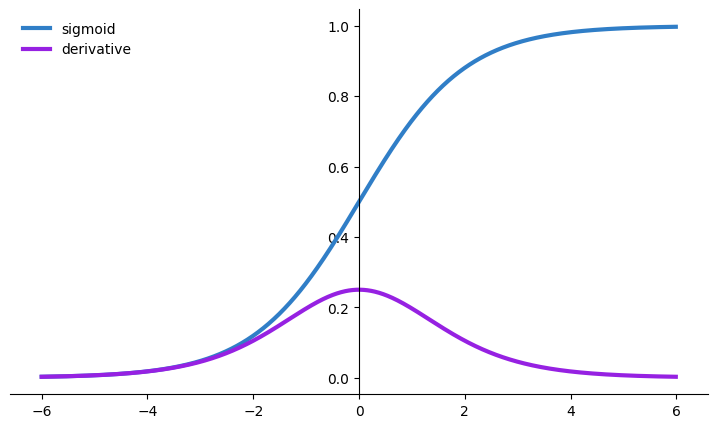

In [16]:
x = np.arange(-6,6, 0.01)

# Plotting
fig, ax = plt.subplots(figsize=(9, 5))

# Customize axes and ticks
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Plot the sigmoid function and its derivative
ax.plot(x, sig(x)[0], color="#307EC7", linewidth=3, label="sigmoid")
ax.plot(x, sig(x)[1], color="#9621E2", linewidth=3, label="derivative")

# Add legend and show the plot
ax.legend(loc="upper left", frameon=False)
plt.show()

| Feature | Pros | Cons |
|---|---|---|
| Sigmoid | Smooth gradient, Bounded output, Differentiable | Vanishing gradient, Not zero-centered output, Computational cost |
| ReLU | Efficient, No vanishing gradient | Dying ReLU problem |
| Leaky ReLU | Addresses dying ReLU | Less smooth gradient than ReLU |
| ELU | Combines ReLU and Leaky ReLU | More complex to compute |
| tanh | Zero-centered output | Less smooth gradient than ReLU |

**Choosing the Right Activation Function:**

* **Complexity of the Problem:** Simpler problems may benefit from sigmoid or ReLU. More complex problems might require Leaky ReLU, ELU, or tanh.
* **Network Architecture:** Deeper networks may benefit from ReLU or its variants to avoid vanishing gradients.
* **Data Distribution:** The distribution of the input data can influence the choice of activation function.


**Tanh Activation Function**

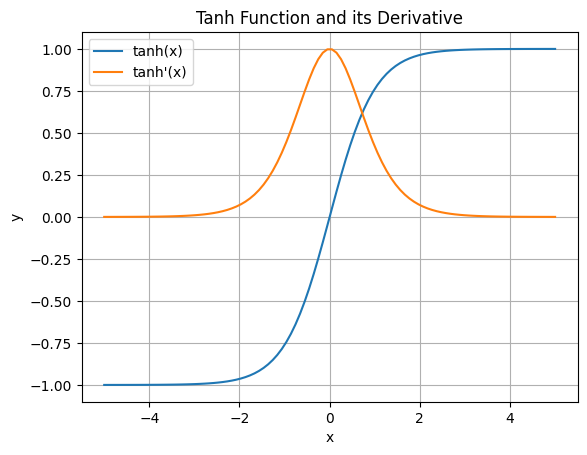

In [17]:
def tanh(x):
  """
  Calculates the hyperbolic tangent of x.

  Args:
    x: Input value.

  Returns:
    The hyperbolic tangent of x.
  """

  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_derivative(x):
  """
  Calculates the derivative of the hyperbolic tangent of x.

  Args:
    x: Input value.

  Returns:
    The derivative of the hyperbolic tangent of x.
  """

  return 1 - tanh(x)**2

# Generate x values
x = np.linspace(-5, 5, 100)

# Calculate tanh(x) and its derivative
y = tanh(x)
y_derivative = tanh_derivative(x)

# Plot the tanh function and its derivative
plt.plot(x, y, label='tanh(x)')
plt.plot(x, y_derivative, label='tanh\'(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tanh Function and its Derivative')
plt.legend()
plt.grid(True)
plt.show()

| Feature | Pros | Cons |
|---|---|---|
| Tanh | Zero-centered output, Smooth gradient, Alleviates vanishing gradient problem | Still susceptible to vanishing gradient for extreme input values, Less computationally efficient than ReLU |

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


For churn perdiction, Cols: RowNumber, CustomerId, Surname are not required so we'll drop these cols

In [21]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing value in any col

All the datatypes look correct

In [23]:
data.shape

(10000, 11)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [25]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Check Duplicates**

In [26]:
data.duplicated().sum()

0

In [27]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [28]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

2037 people left the organization but 7963 are still using the product.

In [29]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

**Performing Encode on Geography and Gender columns**

In [30]:
data = pd.get_dummies(data, columns = ['Geography','Gender'], drop_first = True)

In [31]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [32]:
data['Geography_Germany'] = data['Geography_Germany'].astype(int)
data['Geography_Spain'] = data['Geography_Spain'].astype(int)
data['Gender_Male'] = data['Gender_Male'].astype(int)

In [33]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [36]:
x = data.drop(columns = ['Exited'])
y = data['Exited']

In [37]:
print(x.shape)
print(y.shape)

(10000, 11)
(10000,)


In [34]:
#df_input = df.iloc[:,:-1]
##df_output = df.iloc[:, -1]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
x_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [42]:
print(x_train.shape)
print(y_train.shape)

(8000, 11)
(8000,)


In [43]:
ann = Sequential()

In [44]:
ann.add(Dense(8, input_dim =11, activation='relu'))
ann.add(Dense(5,  activation='relu'))
ann.add(Dense(3, activation='relu'))
ann.add(Dense(1, input_dim =11, activation='sigmoid'))

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
#ann.fit(x_train, y_train, batch_size=100, epochs = 15)
ann.fit(x_train_scaled, y_train,  epochs = 15)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7512 - loss: 0.5544
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7916 - loss: 0.4728
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7960 - loss: 0.4628
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7975 - loss: 0.4536
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7995 - loss: 0.4502
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7959 - loss: 0.4478
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8056 - loss: 0.4377
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8157 - loss: 0.4181
Epoch 9/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8237 - loss: 0.4143
Epoch 10/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8268 - loss: 0.4127
Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8224 - loss: 0.4129
Epoch 12/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

**Find Weights and Biases of the Model**

In [54]:
ann.layers[0].get_weights()

[array([[-7.4611545e-02, -4.5054328e-01,  1.5969592e-01,  6.2901360e-01,
         -4.8462623e-01,  3.7492886e-01,  1.5455602e-01,  4.5494622e-01],
        [-1.9107265e+00,  9.2938465e-01, -6.8208754e-02,  6.5540659e-01,
         -4.0085438e-01, -5.8776610e-02,  4.8902756e-01, -4.0456739e-01],
        [-6.6531427e-02,  5.2758825e-01, -6.0627079e-01,  3.6628908e-01,
         -1.7405134e-01,  5.2122563e-01, -5.6508847e-02,  1.2701996e-01],
        [-1.7945339e-01,  1.3719316e-01,  9.6888058e-02, -1.4196221e-03,
          4.0274483e-01,  5.8226591e-01,  2.5949648e-01, -1.4084986e-01],
        [ 1.9735652e-01, -3.8273286e-02,  6.1728841e-01,  2.4785101e-01,
         -1.8372345e-01, -9.6245384e-01,  2.0086272e-01, -2.1419153e-01],
        [ 1.8299241e-02,  4.0585959e-01,  3.3851254e-01,  1.2042973e+00,
         -3.7186801e-01,  3.2569247e-01, -1.9919711e-01, -1.2151713e-01],
        [-2.4877255e-01, -1.6505296e+00, -7.7255166e-01,  1.0034815e+00,
          1.5528345e+00,  3.5885918e-01, -6.8

In [55]:
ann.layers[3].get_weights()

[array([[-0.30427906],
        [ 0.6618916 ],
        [-0.84592026]], dtype=float32),
 array([-0.33938447], dtype=float32)]

In [56]:
pred1 = ann.predict(x_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


**Model Prediction and Accuracy**

In [58]:
y_pred = ann.predict(x_test_scaled)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.15069914],
       [0.07545742],
       [0.35819513],
       ...,
       [0.5015301 ],
       [0.04939315],
       [0.17623541]], dtype=float32)

In [59]:
y_pred_new = np.where(y_pred>0.5,1,0)
y_pred_new

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [60]:
accuracy_score(y_test, y_pred_new)

0.8335

We have got accuracy of almost 83%.

In [65]:
model_history = ann.fit(x_train_scaled, y_train,  epochs = 15)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8563 - loss: 0.3493
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8612 - loss: 0.3509
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8507 - loss: 0.3630
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8602 - loss: 0.3522
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8604 - loss: 0.3544
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8531 - loss: 0.3577
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8497 - loss: 0.3593
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8684 - loss: 0.3367
Epoch 9/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.3513
Epoch 10/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8597 - loss: 0.3471
Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8565 - loss: 0.3523
Epoch 12/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [64]:
model_history.history

{'accuracy': [0.8488749861717224,
  0.8493750095367432,
  0.8513749837875366,
  0.8531249761581421,
  0.8521249890327454,
  0.8533750176429749,
  0.8544999957084656,
  0.856124997138977,
  0.856374979019165,
  0.8571249842643738,
  0.8568750023841858,
  0.8569999933242798,
  0.8573750257492065,
  0.8572499752044678,
  0.8571249842643738],
 'loss': [0.36644619703292847,
  0.3640393614768982,
  0.36218497157096863,
  0.3606814444065094,
  0.3590882122516632,
  0.3582741916179657,
  0.35701075196266174,
  0.356243371963501,
  0.35541456937789917,
  0.3548503518104553,
  0.3540654182434082,
  0.35353896021842957,
  0.3529958128929138,
  0.35267966985702515,
  0.3516397178173065]}

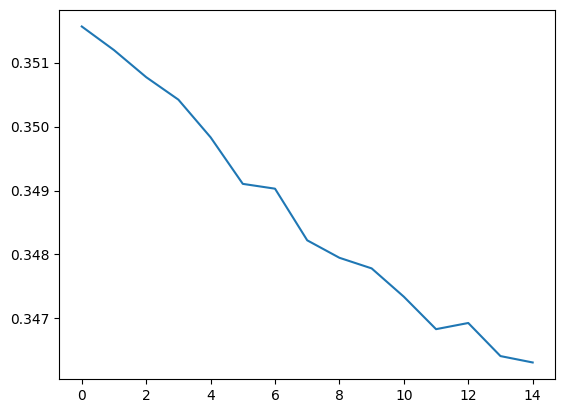

In [67]:
plt.plot(model_history.history['loss'])

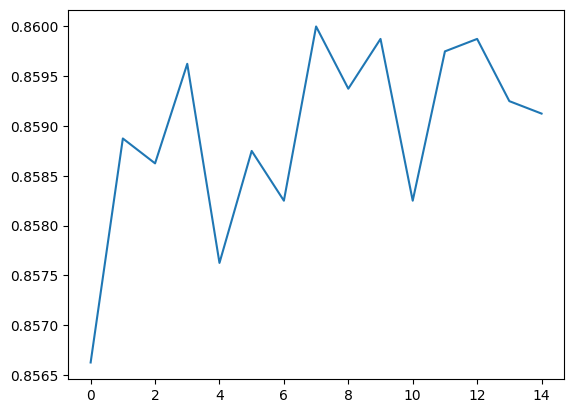

In [66]:
plt.plot(model_history.history['accuracy'])